[24.35242421] [0.09016334]
[5.38787924]
[0.01994829]


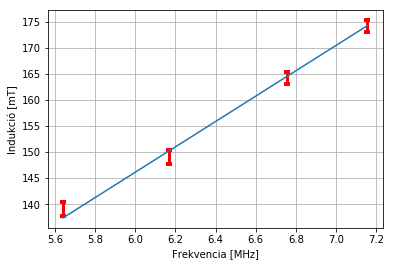

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimise

induction = np.array([41.5, 44.5, 49, 52])

induction *= 3.35 # mT

induction_err = np.array([1.34, 1.28, 1.16, 1.08])

frequency = np.array([5.641, 6.167, 6.754, 7.155])

frequency_err = np.array([0.0005, 0.0005, 0.0005, 0.0005])

ylabel('Indukció [mT]')
xlabel('Frekvencia [MHz]')

def egyenes(m,x):
    return m*x

params, cov = optimise.curve_fit(egyenes, frequency, induction)
params, cov = optimise.curve_fit(egyenes, frequency, induction, p0=params)
linerr=np.sqrt(np.diag(cov))

plt.errorbar(frequency, induction, induction_err, elinewidth=3, capsize = 3, capthick=4, linewidth=0, color='red')
illesztett = plt.plot(frequency, egyenes(frequency, *params))

print(params, linerr)

params *= 10**-9
linerr *= 10**-9

linerr = linerr/params
params = (6.626 * 10**-34) / (5.05 * 10**-27 * params)
linerr *= params

print(params)
print(linerr)



grid(True)

plt.savefig('egyenes.png')